In [29]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import RegexpTokenizer
from nltk.corpus import brown

import gensim

from sklearn.decomposition import PCA

from matplotlib import pyplot

In [30]:
file = open("../Embeddings/fulltext.txt")
lines = file.readlines()

In [34]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [35]:
sentences = []
for line in lines:
    sentences.append(word_tokenize(line))
        

In [39]:
model = gensim.models.Word2Vec(sentences, sg=1)

In [40]:
x = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(x)

/home/nelio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [41]:
def plotlist(list):
  x = []
  for element in list:
    x.append(model[element])

  result = pca.fit_transform(x)
  pyplot.scatter(result[:, 0], result[:, 1])
  for i, word in enumerate(list):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
  pyplot.show()

/home/nelio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


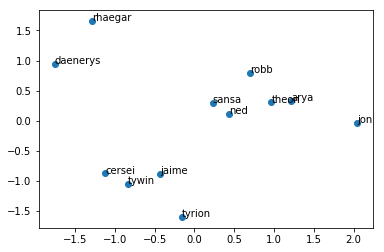

In [42]:
characters = [
              'jon',
              'sansa',
              'arya',
              'daenerys',
              'theon',
              'robb',
              'cersei',
              'ned',
              'rhaegar',
              'jaime',
              'tyrion',
              'tywin'
]

plotlist(characters)

/home/nelio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


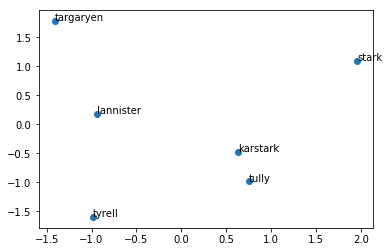

In [43]:
houses = [
          'stark',
          'lannister',
          'targaryen',
          'karstark',
          'tyrell',
          'tully'
]
plotlist(houses)

/home/nelio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


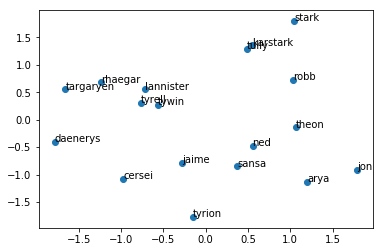

In [44]:
charactersandhouses = [
            'jon',
            'sansa',
            'arya',
            'daenerys',
            'theon',
            'robb',
            'cersei',
            'ned',
            'rhaegar',
            'jaime',
            'tyrion',
            'tywin',
            'stark',
            'lannister',
            'targaryen',
            'karstark',
            'tyrell',
            'tully'
]

plotlist(charactersandhouses)